# Supervised - Binary classification with gender feature

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
import statistics
from sklearn.multiclass import OneVsRestClassifier
import time
from sklearn.impute import SimpleImputer
# C:\Users\ADMIN\Desktop\new_df.csv

data=pd.read_csv(r'C:\Users\ADMIN\Desktop\new_df.csv')
df = pd.DataFrame(data)
test_df = df

print(df.shape)



(67836, 22)


In [2]:
print(df.shape)


(67836, 22)


Weightage of value for age feature
 emergency room        53.703049
physician referred    31.027773
Other                 15.269179
Name: admission_source, dtype: float64


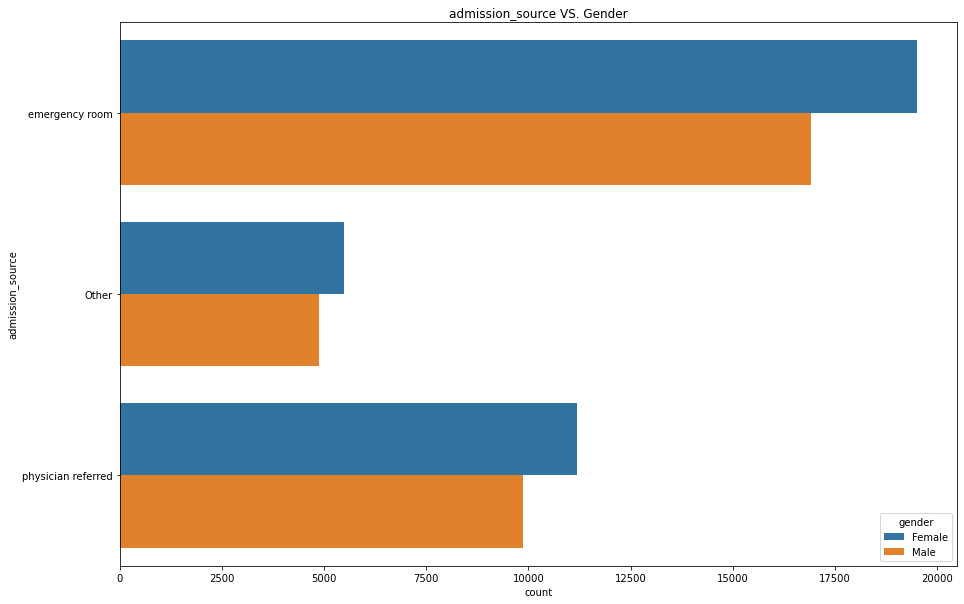

In [7]:
# Data insights
import matplotlib.pyplot as plt
import seaborn as sns
# 1. admission_source VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['admission_source'], hue = df['gender']).set_title('admission_source VS. Gender')

print('Weightage of value for age feature\n',df['admission_source'].value_counts(normalize=True) * 100)

Weightage of value for age feature
 75    25.439295
65    22.464473
55    17.707412
85    15.906009
45     9.744089
35     3.843092
95     2.508992
15     2.386638
Name: age, dtype: float64


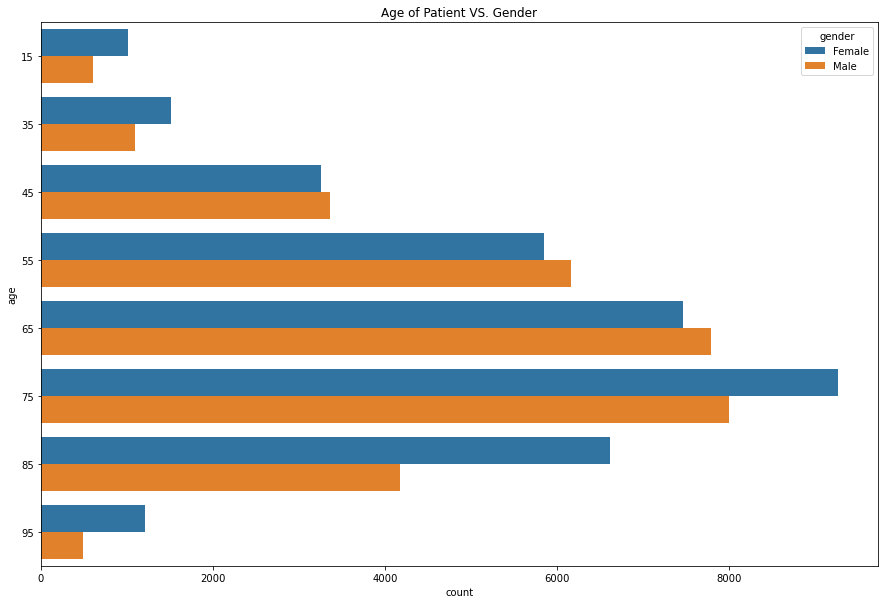

In [8]:
# Data insights

# 1. Age of Patient VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['gender']).set_title('Age of Patient VS. Gender')

print('Weightage of value for age feature\n',df['age'].value_counts(normalize=True) * 100)

Weightage of value for age feature
 75    25.439295
65    22.464473
55    17.707412
85    15.906009
45     9.744089
35     3.843092
95     2.508992
15     2.386638
Name: age, dtype: float64


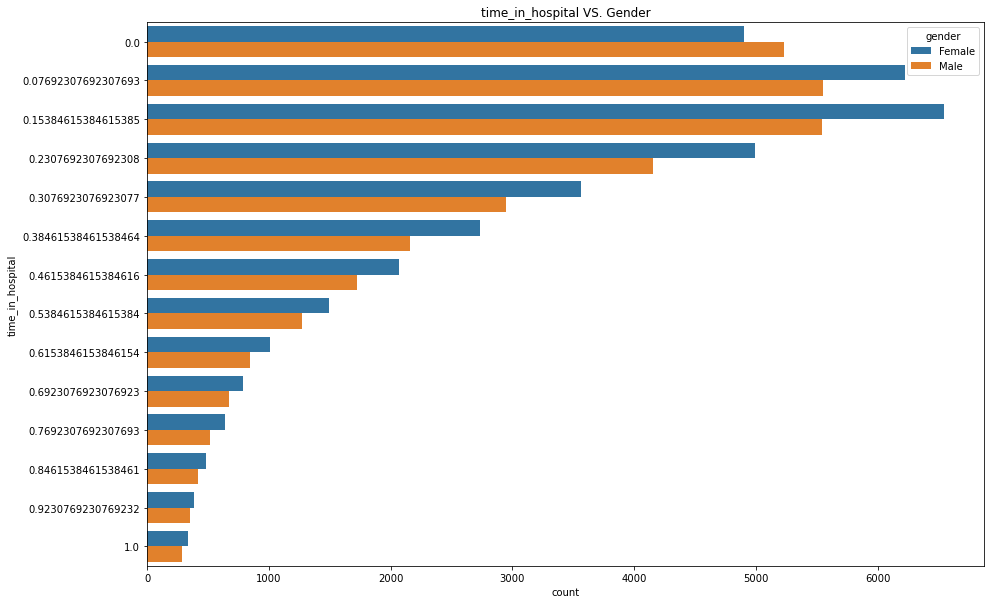

In [9]:
# Data insights

# 2. time_in_hospital VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['time_in_hospital'], hue = df['gender']).set_title('time_in_hospital VS. Gender')

print('Weightage of value for age feature\n',df['age'].value_counts(normalize=True) * 100)

Weightage of value for age feature
 Circulatory        30.653340
Other              17.322661
Respiratory        13.606345
Digestive           9.331328
Diabetes            7.964797
Injury              6.723569
Musculoskeletal     5.809600
Genitourinary       4.950174
Neoplasms           3.638186
Name: diag_1, dtype: float64


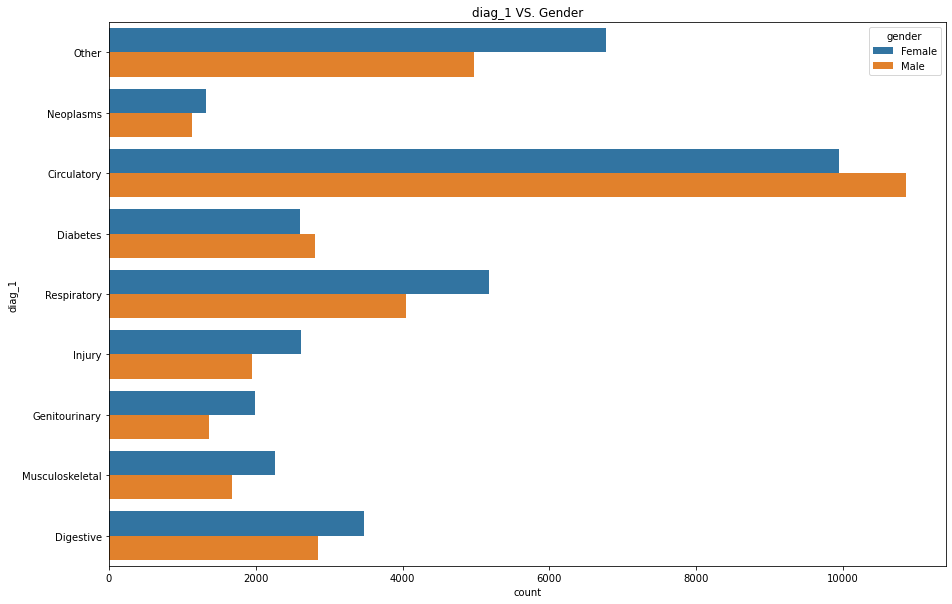

In [10]:
# Data insights

# 3. diag_1 VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['diag_1'], hue = df['gender']).set_title('diag_1 VS. Gender')

print('Weightage of value for age feature\n',df['diag_1'].value_counts(normalize=True) * 100)

Weightage of value for age feature
 No        49.301256
Steady    30.525090
Down      10.541600
Up         9.632054
Name: insulin, dtype: float64


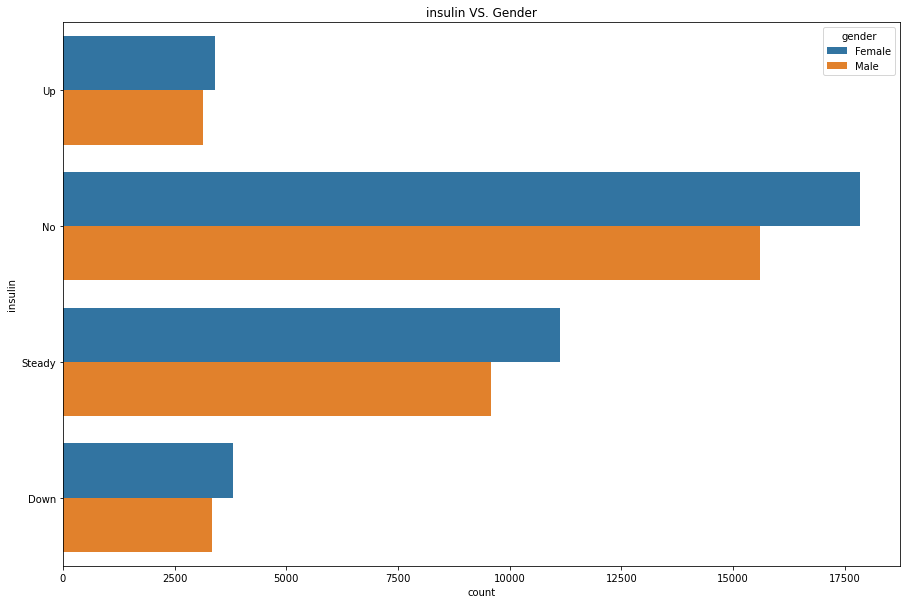

In [11]:
# Data insights

# 4. insulin VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['insulin'], hue = df['gender']).set_title('insulin VS. Gender')

print('Weightage of value for age feature\n',df['insulin'].value_counts(normalize=True) * 100)

Weightage of value for age feature
 missing/unknown           48.054131
Other                     18.280854
InternalMedicine          15.096704
Family/GeneralPractice     7.111268
Cardiology                 6.058730
Surgery                    5.398314
Name: medical_specialty, dtype: float64


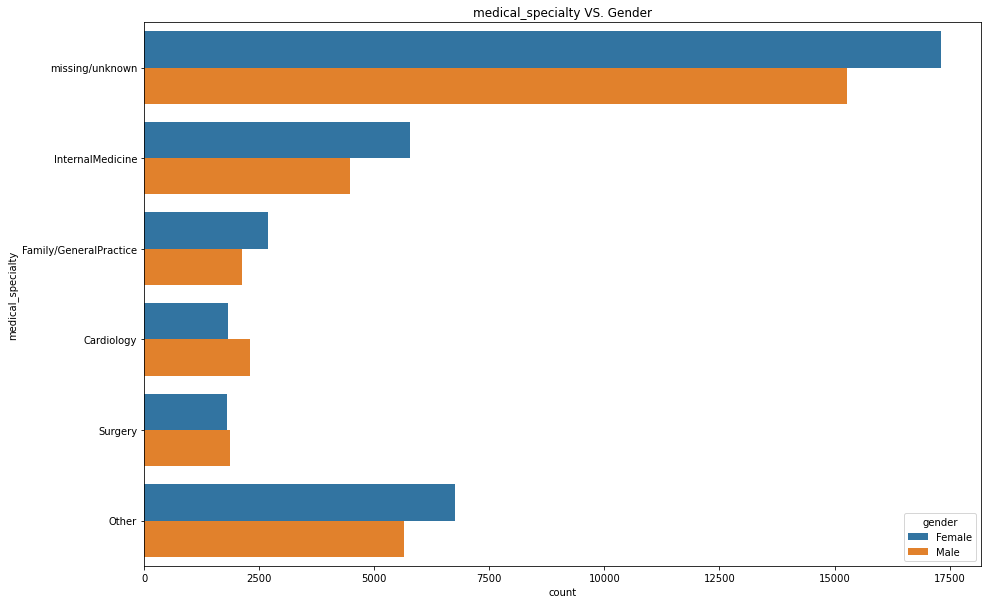

In [12]:
# Data insights

# 5. medical_specialty VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['medical_specialty'], hue = df['gender']).set_title('medical_specialty VS. Gender')

print('Weightage of value for age feature\n',df['medical_specialty'].value_counts(normalize=True) * 100)

Weightage of value for age feature
 Caucasian          76.854473
AfricanAmerican    18.544726
Other               4.600802
Name: race, dtype: float64


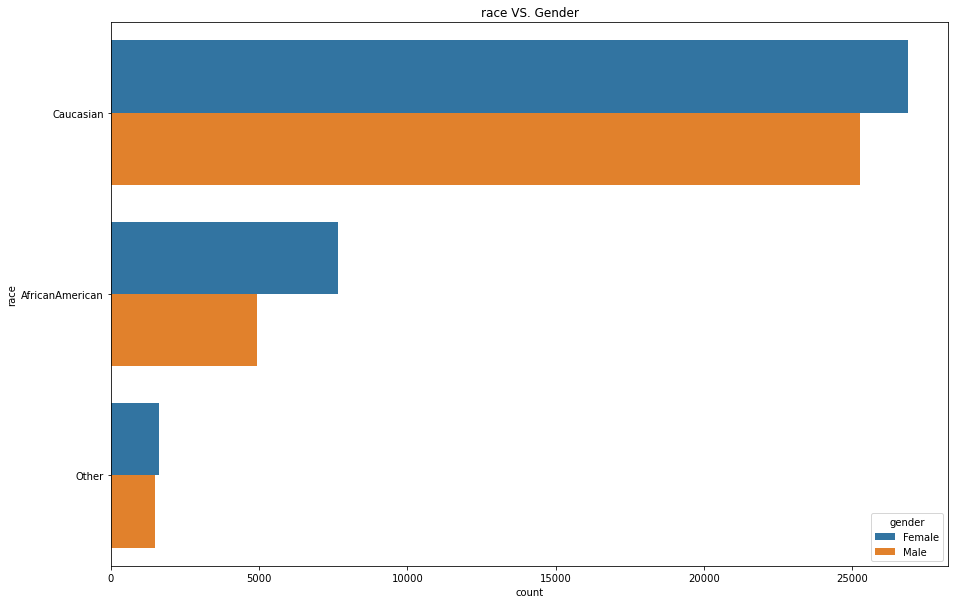

In [13]:
# Data insights

# 6. race VS. Gender

fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['race'], hue = df['gender']).set_title('race VS. Gender')

print('Weightage of value for age feature\n',df['race'].value_counts(normalize=True) * 100)

Correlation matrix



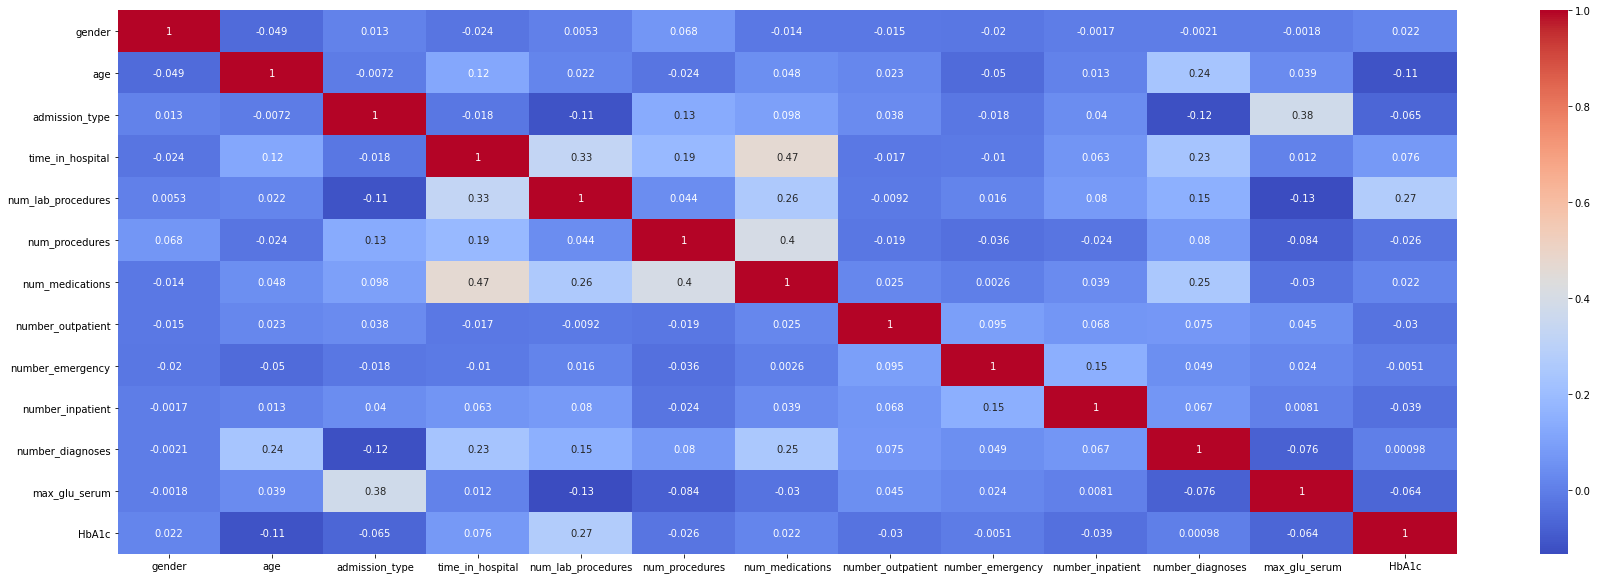

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
print('Correlation matrix\n')
g=sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [14]:
y = df['gender']
x = df.drop('gender', axis=1)
print('target : ', y.shape)
print('features : ',x.shape)

target :  (67836,)
features :  (67836, 21)


In [15]:
x = pd.get_dummies(x,drop_first=True)
print(x.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y)
y =le.transform(y)

print(x.shape)
print(y.shape)


(67836, 37)
(67836, 37)
(67836,)


In [16]:

print(y[1])
print('Value count %s' % Counter(y))

0
Value count Counter({0: 36172, 1: 31664})


In [11]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
import statistics 

KNNClassifier = KNeighborsClassifier(n_neighbors=8)
KNN_cross_score = cross_val_score(KNNClassifier, x, y, cv=10)

GNBClassifier= GaussianNB()
GNB_cross_score = cross_val_score(GNBClassifier, x, y, cv=10)

DTCClassifier= DecisionTreeClassifier(criterion = "entropy",max_depth=10)
DTC_cross_score = cross_val_score(DTCClassifier, x, y, cv=10)

rfc = RandomForestClassifier(n_estimators=50,max_depth=2, random_state=0)
RFC_cross_score = cross_val_score(rfc, x, y, cv=10)

etc = ExtraTreesClassifier(n_estimators=100, criterion='entropy',class_weight='balanced',random_state=0)
ETC_cross_score = cross_val_score(etc, x, y, cv=10)

In [12]:
knn_mean=KNN_cross_score.mean().round(3)
gnb_mean=GNB_cross_score.mean().round(3)
dtc_mean=DTC_cross_score.mean().round(3)
rfc_mean=RFC_cross_score.mean().round(3)
#svm_mean=SVM_cross_score.mean().round(3)
etc_mean=ETC_cross_score.mean().round(3)

knn_std=round(statistics.stdev(KNN_cross_score),3)
gnb_std=round(statistics.stdev(GNB_cross_score),3)
dtc_std=round(statistics.stdev(DTC_cross_score),3)
rfc_std=round(statistics.stdev(RFC_cross_score),3)
#svm_std=round(statistics.stdev(SVM_cross_score),3)
etc_std=round(statistics.stdev(ETC_cross_score),3)

knn_list = []
gnb_list = []
dtc_list = []
svm_list = []
rfc_list = []
etc_list = []
indexing = []


fold_Size = 10;

print('---------------------------------------------------------------------------------------------------------')
print('Fold\t\tNearest Neighbour\tNaive Bayes\tDecision tree\tRandom forest')
print('---------------------------------------------------------------------------------------------------------')
for i in range(fold_Size):
    print(i+1,'\t\t',KNN_cross_score[i].round(3),'\t\t\t',GNB_cross_score[i].round(3),
              '\t\t', DTC_cross_score[i].round(3),'\t\t',
              '\t\t',RFC_cross_score[i].round(3),'\t\t',ETC_cross_score[i].round(3))
    
    knn_list.append(KNN_cross_score[i].round(3))
    gnb_list.append(GNB_cross_score[i].round(3))
    dtc_list.append(DTC_cross_score[i].round(3))
    #svm_list.append(SVM_cross_score[i].round(3))
    rfc_list.append(RFC_cross_score[i].round(3))
    etc_list.append(ETC_cross_score[i].round(3))
    indexing.append(i+1)
    
print('---------------------------------------------------------------------------------------------------------')
print('Avg score\t',knn_mean,'\t\t\t',gnb_mean,'\t\t',dtc_mean,'\t\t',rfc_mean,'\t\t',etc_mean)
print('Std dev\t\t',knn_std,'\t\t\t',gnb_std,'\t\t',dtc_std,'\t\t',rfc_std,'\t\t',etc_std)
print('---------------------------------------------------------------------------------------------------------')




---------------------------------------------------------------------------------------------------------
Fold		Nearest Neighbour	Naive Bayes	Decision tree	Random forest
---------------------------------------------------------------------------------------------------------
1 		 0.543 			 0.565 		 0.558 		 		 0.545 		 0.551
2 		 0.547 			 0.557 		 0.559 		 		 0.54 		 0.551
3 		 0.542 			 0.555 		 0.563 		 		 0.54 		 0.558
4 		 0.535 			 0.555 		 0.569 		 		 0.543 		 0.561
5 		 0.551 			 0.563 		 0.568 		 		 0.541 		 0.573
6 		 0.547 			 0.562 		 0.569 		 		 0.542 		 0.561
7 		 0.553 			 0.569 		 0.573 		 		 0.539 		 0.566
8 		 0.545 			 0.552 		 0.562 		 		 0.538 		 0.559
9 		 0.546 			 0.562 		 0.565 		 		 0.542 		 0.556
10 		 0.541 			 0.56 		 0.564 		 		 0.544 		 0.568
---------------------------------------------------------------------------------------------------------
Avg score	 0.545 			 0.56 		 0.565 		 0.541 		 0.56
Std dev		 0.005 			 0.005 		 0.005 		 0.002 		 0.007
-----

In [18]:
# Splitting of train and test data
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc,precision_recall_curve,confusion_matrix,accuracy_score,classification_report

x_train, x_test, y_train, y_test =\
        train_test_split(x, y, test_size=0.20, random_state=0)
print('\nTrain dataset shape : ',x_train.shape,'\nTest dataset shape : ', x_test.shape)

stdScaler= StandardScaler()    
x_train= stdScaler.fit_transform(x_train)    
x_test= stdScaler.transform(x_test)  


Train dataset shape :  (54268, 37) 
Test dataset shape :  (13568, 37)


# K-NN

In [24]:
import time
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
KNNClassifier = KNeighborsClassifier(n_neighbors=8)
KNNClassifier.fit(x_train, y_train)
y_pred = KNNClassifier.predict(x_test)
print('KNN Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for KNN :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
y_pred_prob_KNN = KNNClassifier.predict_proba(x_test)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(y_test, y_pred_prob_KNN)
 
print('Classification report:\n',classification_report(y_test,y_pred))
end = time.time()
print('\nRun time  :\t',round(end-start, 2),' seconds')

KNN Classifier accuracy score: 0.5413
Confusion matrix for KNN :
 [[5059 2132]
 [4092 2285]]
Target feature : Female encoded as 0
 Male encoded as 1

Classification report:
               precision    recall  f1-score   support

           0       0.55      0.70      0.62      7191
           1       0.52      0.36      0.42      6377

    accuracy                           0.54     13568
   macro avg       0.54      0.53      0.52     13568
weighted avg       0.54      0.54      0.53     13568


Run time  :	 194.68  seconds


# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
import time

start = time.time()
DTCClassifier= DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
DTCClassifier.fit(x_train, y_train)
y_pred = DTCClassifier.predict(x_test)
print('Decision tree Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for DTC :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
y_pred_prob_DTC = DTCClassifier.predict_proba(x_test)[:,1]
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(y_test, y_pred_prob_DTC)
roc_auc_DTC = auc(fpr_DTC, tpr_DTC)
precision_DTC, recall_DTC, th_DTC = precision_recall_curve(y_test, y_pred_prob_DTC)

print('Classification report:\n',classification_report(y_test,y_pred))
end = time.time()
print('\nRun time  :\t',round(end-start, 2),' seconds')

Decision tree Classifier accuracy score: 0.5667
Confusion matrix for DTC :
 [[4489 2702]
 [3177 3200]]
Target feature : Female encoded as 0
 Male encoded as 1

Classification report:
               precision    recall  f1-score   support

           0       0.59      0.62      0.60      7191
           1       0.54      0.50      0.52      6377

    accuracy                           0.57     13568
   macro avg       0.56      0.56      0.56     13568
weighted avg       0.57      0.57      0.57     13568


Run time  :	 0.39  seconds


# SVM

In [ ]:
# Linear models - SVM
from sklearn import svm

start = time.time()
SVMlinearClassifier=svm.SVC(gamma='auto')
SVMlinearClassifier=svm.SVC(gamma='scale')
SVMlinearClassifier=svm.SVC(probability=True)

SVMlinearClassifier.fit(x_train,y_train)
y_pred = SVMlinearClassifier.predict(x_test)
print('SVM Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for SVM :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')

y_pred_prob_svm = SVMlinearClassifier.predict_proba(x_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_gnb, tpr_svm)
precision_svm, recall_nb, th_svm = precision_recall_curve(y_test, y_pred_prob_svm)

print('Classification report:\n',classification_report(y_test,y_pred))
end = time.time()
print('\nRun time for SVM  :\t',round(end-start, 2),' seconds')

# Guassian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

start = time.time()
GNBClassifier= BernoulliNB()
GNBClassifier.fit(x_train,y_train)
y_pred = GNBClassifier.predict(x_test)
print('GNB Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for GNB :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
y_pred_prob_nb = GNBClassifier.predict_proba(x_test)[:,1]
fpr_gnb, tpr_gnb, thresholds_nb = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_gnb, tpr_gnb)
precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred_prob_nb)

print('Classification report:\n',classification_report(y_test,y_pred))
end = time.time()
print('\nRun time for G-Naive bayes  :\t',round(end-start, 2),' seconds')

GNB Classifier accuracy score: 0.5644
Confusion matrix for GNB :
 [[4939 2252]
 [3658 2719]]
Target feature : Female encoded as 0
 Male encoded as 1

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.69      0.63      7191
           1       0.55      0.43      0.48      6377

    accuracy                           0.56     13568
   macro avg       0.56      0.56      0.55     13568
weighted avg       0.56      0.56      0.56     13568


Run time for G-Naive bayes  :	 0.12  seconds


# Random Forest

In [22]:
# random forest classifier

from sklearn.ensemble import RandomForestClassifier

start = time.time()
rfc = RandomForestClassifier(n_estimators=100,max_depth=15, class_weight='balanced', random_state=32)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print('RFC Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for RFC :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
print("\nClassification Report: \n {}\n".format(classification_report(y_test, y_pred)))
y_pred_prob_rfc = rfc.predict_proba(x_test)[:,1]
fpr_rfc, tpr_rfc, thresholds_nb = roc_curve(y_test, y_pred_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
precision_rfc, recall_rfc, th_rfc = precision_recall_curve(y_test, y_pred_prob_nb)

end = time.time()

print('Run time for Random forest :',round(end-start, 2),' seconds')

RFC Classifier accuracy score: 0.5823
Confusion matrix for RFC :
 [[4197 2994]
 [2673 3704]]
Target feature : Female encoded as 0
 Male encoded as 1


Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.58      0.60      7191
           1       0.55      0.58      0.57      6377

    accuracy                           0.58     13568
   macro avg       0.58      0.58      0.58     13568
weighted avg       0.58      0.58      0.58     13568


Run time for Random forest : 7.93  seconds


# Bagging with Decision tree

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

start = time.time()
DTCClassifier= DecisionTreeClassifier(criterion = "entropy",max_depth=10)
bagDTC = BaggingClassifier(DTCClassifier,max_samples=0.5, max_features=0.5,n_estimators=10)

bagDTC.fit(x_train,y_train)
y_pred = bagDTC.predict(x_test)
print('Bagging-DTC Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for Bagging Decision tree :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
print("\nClassification Report: \n {}\n".format(classification_report(y_test, y_pred)))
y_pred_prob_bdtc = bagDTC.predict_proba(x_test)[:,1]
fpr_bdtc, tpr_bdtc, thresholds_bdtc = roc_curve(y_test, y_pred_prob_bdtc)
roc_auc_bdtc = auc(fpr_bdtc, tpr_bdtc)
precision_bdtc, recall_bdtc, th_bdtc = precision_recall_curve(y_test, y_pred_prob_bdtc)

end = time.time()
print('Run time for Bagging with Decision tree :',round(end-start, 2),' seconds')

Bagging-DTC Classifier accuracy score: 0.5715
Confusion matrix for Bagging Decision tree :
 [[5271 1920]
 [3894 2483]]
Target feature : Female encoded as 0
 Male encoded as 1


Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.73      0.64      7191
           1       0.56      0.39      0.46      6377

    accuracy                           0.57     13568
   macro avg       0.57      0.56      0.55     13568
weighted avg       0.57      0.57      0.56     13568


Run time for Bagging with Decision tree : 0.95  seconds


# Gradient boosting 

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
boost = GradientBoostingClassifier(random_state=32,n_estimators=100)

boost.fit(x_train,y_train)
y_pred = boost.predict(x_test)
print('Gradient boosting Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for gradient boosting :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
print("\nClassification Report: \n {}\n".format(classification_report(y_test, y_pred)))
y_pred_prob_grb = boost.predict_proba(x_test)[:,1]
fpr_grb, tpr_grb, thresholds_grb = roc_curve(y_test, y_pred_prob_grb)
roc_auc_grb = auc(fpr_grb, tpr_grb)
precision_grb, recall_grb, th_grb = precision_recall_curve(y_test, y_pred_prob_grb)

end = time.time()
print('Run time for gradient boosting classifier :',round(end-start, 2),' seconds')

Gradient boosting Classifier accuracy score: 0.5837
Confusion matrix for gradient boosting :
 [[8335 3623]
 [5696 4732]]
Target feature : Female encoded as 0
 Male encoded as 1


Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.70      0.64     11958
           1       0.57      0.45      0.50     10428

    accuracy                           0.58     22386
   macro avg       0.58      0.58      0.57     22386
weighted avg       0.58      0.58      0.58     22386


Run time for gradient boosting classifier : 12.79  seconds


# Adaboost algo -

In [113]:
from sklearn.ensemble import AdaBoostClassifier

start = time.time()
DTCClassifier= DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
abc = AdaBoostClassifier(base_estimator=DTCClassifier, n_estimators=50, learning_rate=1, random_state=0)


abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
print('ADA boosting Classifier accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Confusion matrix for ADA boosting :\n',confusion_matrix(y_test,y_pred))
print('Target feature : Female encoded as 0\n Male encoded as 1\n')
print("\nClassification Report: \n {}\n".format(classification_report(y_test, y_pred)))
y_pred_prob_abc = abc.predict_proba(x_test)[:,1]
fpr_abc, tpr_abc, thresholds_abc = roc_curve(y_test, y_pred_prob_abc)
roc_auc_abc = auc(fpr_abc, tpr_abc)
precision_abc, recall_abc, th_abc = precision_recall_curve(y_test, y_pred_prob_abc)
end = time.time()
print('Run time for gradient boosting classifier :',round(end-start, 2),' seconds')


ADA boosting Classifier accuracy score: 0.5301
Confusion matrix for ADA boosting :
 [[6486 5094]
 [5175 5097]]
Target feature : Female encoded as 0
 Male encoded as 1


Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56     11580
           1       0.50      0.50      0.50     10272

    accuracy                           0.53     21852
   macro avg       0.53      0.53      0.53     21852
weighted avg       0.53      0.53      0.53     21852


Run time for gradient boosting classifier : 24.17  seconds


Plotting ROC curves :



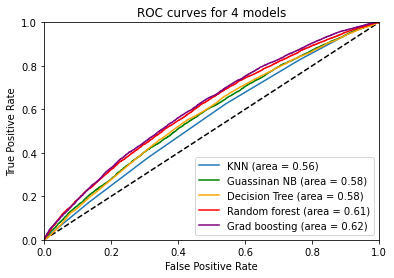

In [94]:
# ROC Curves

print('Plotting ROC curves :\n')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.2f)' % roc_auc_KNN)
plt.plot(fpr_gnb, tpr_gnb, color='green',label='Guassinan NB (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_dtree, tpr_dtree, color='orange',label='Decision Tree (area = %0.2f)' % roc_auc_Tree)
plt.plot(fpr_rfc, tpr_rfc, color='red',label='Random forest (area = %0.2f)' % roc_auc_rfc)
plt.plot(fpr_grb, tpr_grb, color='#800080',label='Grad boosting (area = %0.2f)' % roc_auc_grb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for 4 models')
plt.legend(loc='lower right')
plt.show()